# Тестовое задание SQL

Предоставленная база SQLITE содержит 2 таблицы - данные по депозитам на условных торговых счетах и таблицу соответствия счетов торговым роботам, с периодами активности этих роботов.
В таблице депозитов есть поле timestamp - кратное минуте, записи в рамках одной минуты для разных счетов имеют одинаковый timestamp.
У каждого робота 2 счёта, и они могут меняться (в этом случае период активности по счёту завершается, и в таблице открывается новый период с новым счётом).

Необходимо написать SQL запросы:


In [ ]:
from sqlite3 import connect
import pandas as pd
conn = connect(database='test.sqlite')

In [ ]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table'", conn)

,name
0,inv
1,deposits


In [ ]:
pd.read_sql("SELECT * FROM inv GROUP BY field2", conn)

,field1,field2,field3,field4
0,bot2,a.acc1,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
1,bot1,a.acc2,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
2,bot3,a.acc3,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
3,bot4,a.acc4,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
4,bot1,b.acc1,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
5,bot3,b.acc2,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
6,bot2,b.acc3,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03
7,bot4,b.acc4,2021-04-25 12:01:00+03,2022-01-12 12:00:00+03


In [ ]:
pd.read_sql("SELECT * FROM deposits LIMIT 10", conn)


,timestamp,account_id,deposit
0,2022-02-11 15:48:00+03,a.acc2,7.586713
1,2022-02-11 15:48:00+03,a.acc3,8.357887
2,2022-02-11 15:48:00+03,a.acc1,3.370693
3,2022-02-11 15:48:00+03,a.acc4,4.969985
4,2022-02-11 15:48:00+03,b.acc4,6.128907
5,2022-02-11 15:48:00+03,b.acc1,8.057461
6,2022-02-11 15:48:00+03,b.acc2,3.455221
7,2022-02-11 15:48:00+03,b.acc3,2.581823
8,2022-02-11 15:49:00+03,b.acc1,8.054418
9,2022-02-11 15:49:00+03,b.acc2,3.445522


### Вывести сумму депозитов по счетам для каждого робота за его периоды активности.


In [ ]:
"""Не совсем понял вопрос... Просуммировать все значения за весь период активности по полю deposit для каждого \
робота по счетам или посчитать сумму остатков на счетах на момент выключения робота? Ниже сделал по первому варианту, составив сводную таблицу... """
query = "SELECT field1 AS bot_name, \
        field2 AS acc_id, \
        field3 AS time_open, \
        field4 AS time_close, account_id, SUM(deposit) as sum_deposits, timestamp\
        FROM inv INNER JOIN deposits ON account_id == field2 \
        WHERE timestamp BETWEEN  field3 AND field4 \
        GROUP BY field1, field2 \
        LIMIT 20"
pd.read_sql(query, conn)

,bot_name,acc_id,time_open,time_close,account_id,sum_deposits,timestamp
0,bot1,a.acc1,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,a.acc1,5603.407453,2022-02-14 14:18:00+03
1,bot1,b.acc1,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,b.acc1,34182.278011,2022-02-14 14:18:00+03
2,bot2,a.acc2,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,a.acc2,12790.299638,2022-02-14 14:18:00+03
3,bot2,b.acc2,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,b.acc2,14687.001508,2022-02-14 14:18:00+03
4,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,a.acc3,14088.706722,2022-02-14 14:18:00+03
5,bot3,b.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,b.acc3,10960.289956,2022-02-14 14:18:00+03
6,bot4,a.acc4,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,a.acc4,8270.597224,2022-02-14 14:18:00+03
7,bot4,b.acc4,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,b.acc4,26223.460494,2022-02-14 14:18:00+03


In [ ]:
query = "SELECT i.field1 AS bot_name, \
        i.field2 AS acc_id, \
        i.field3 AS time_open, \
        i.field4 AS time_close, \
        d.timestamp, \
        SUM(CASE WHEN i.field1 in (SELECT DISTINCT field1 FROM inv) THEN d.deposit END) AS sum_deposits\
        FROM inv i JOIN deposits d ON i.field2 = d.account_id \
        WHERE timestamp BETWEEN time_open AND time_close\
        GROUP BY d.account_id"
pd.read_sql(query, conn)

,bot_name,acc_id,time_open,time_close,timestamp,sum_deposits
0,bot1,a.acc1,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,5603.407453
1,bot2,a.acc2,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,12790.299638
2,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,14088.706722
3,bot4,a.acc4,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,8270.597224
4,bot1,b.acc1,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,34182.278011
5,bot2,b.acc2,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,14687.001508
6,bot3,b.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,10960.289956
7,bot4,b.acc4,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:18:00+03,26223.460494


### Рассчитать для каждого робота доход или убыток (в валюте) с начала записанных в таблице депозитов данных до каждого timestamp’a


In [ ]:
query = "SELECT field1, field2, timestamp, deposit_on_time - deposit AS deposit_diff, deposit, deposit_on_time FROM (SELECT deposit as deposit_on_time, field1, field2, field3, field4,timestamp, MIN(timestamp) as start_time \
         FROM inv JOIN deposits ON inv.field2 = deposits.account_id \
         WHERE timestamp BETWEEN field3 AND field4 \
         GROUP BY field1, field2) AS t1 JOIN (SELECT i.field1 AS bot_name, \
        i.field2 AS acc_id, \
        i.field3 AS time_open, \
        i.field4 AS time_close, \
        d.deposit \
        FROM inv i JOIN deposits d ON i.field2 = d.account_id \
        WHERE timestamp BETWEEN time_open AND time_close) AS t2 ON t1.field2 = t2.acc_id"
pd.read_sql(query, conn)

,field1,field2,timestamp,deposit_diff,deposit,deposit_on_time
0,bot1,a.acc1,2022-02-11 15:48:00+03,0.000000,3.370693,3.370693
1,bot1,a.acc1,2022-02-11 15:48:00+03,-0.003160,3.373853,3.370693
2,bot1,a.acc1,2022-02-11 15:48:00+03,-0.007713,3.378406,3.370693
3,bot1,a.acc1,2022-02-11 15:48:00+03,-0.010551,3.381244,3.370693
4,bot1,a.acc1,2022-02-11 15:48:00+03,-0.008427,3.379120,3.370693
...,...,...,...,...,...,...
23541,bot4,b.acc4,2022-02-11 15:48:00+03,-0.141643,6.270551,6.128907
23542,bot4,b.acc4,2022-02-11 15:48:00+03,-0.142120,6.271027,6.128907
23543,bot4,b.acc4,2022-02-11 15:48:00+03,-0.140367,6.269275,6.128907
23544,bot4,b.acc4,2022-02-11 15:48:00+03,-0.143242,6.272149,6.128907


### Для каждого робота вывести таблицу, в которой отражались бы в разных столбцах депозиты по его счетам (для всех таймстемпов), а также столбец с относительной разницей депозитов (т.е. |депозит1-депозит2|/(депозит1 + депозит2)) и флаг, если такая разница больше 10%.


### **ОТВЕТ ПРИЛОЖУ СКРИНАМИ ИЗ DATAGRIP** так как в колабе возникают проблемы с использованием оконных фунций(

снова не понял) имеется ввиду депозиты на момент закрытия? или пробегаться по всем timestamp? наверное первое

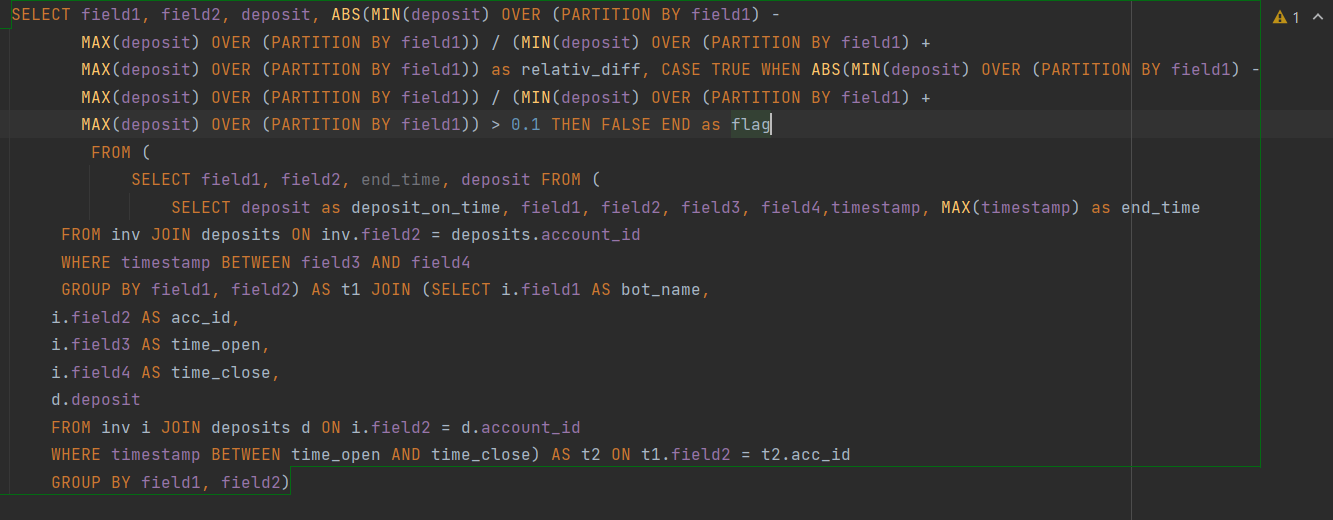

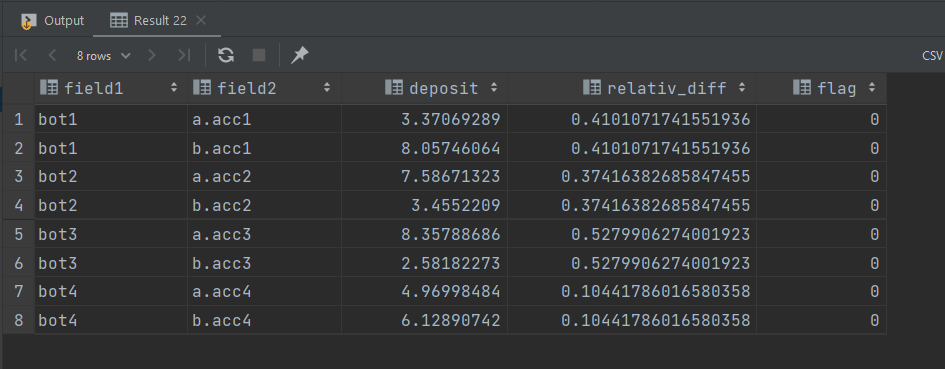

In [ ]:


query = "SELECT field1, field2, deposit, ABS(MIN(deposit) OVER (PARTITION BY field1) - \
               MAX(deposit) OVER (PARTITION BY field1)) / (MIN(deposit) OVER (PARTITION BY field1) + \
               MAX(deposit) OVER (PARTITION BY field1)) as relativ_diff, \
               CASE TRUE WHEN ABS(MIN(deposit) OVER (PARTITION BY field1) - \
               MAX(deposit) OVER (PARTITION BY field1)) / (MIN(deposit) OVER (PARTITION BY field1) + \
               MAX(deposit) OVER (PARTITION BY field1)) > 0.1 THEN FALSE END as flag \
                FROM ( \
                    SELECT field1, field2, end_time, deposit FROM ( \
                        SELECT deposit as deposit_on_time, field1, field2, field3, field4,timestamp, MAX(timestamp) as end_time \
             FROM inv JOIN deposits ON inv.field2 = deposits.account_id \
             WHERE timestamp BETWEEN field3 AND field4 \
             GROUP BY field1, field2) AS t1 JOIN (SELECT i.field1 AS bot_name, \
            i.field2 AS acc_id, \
            i.field3 AS time_open, \
            i.field4 AS time_close, \
            d.deposit \
            FROM inv i JOIN deposits d ON i.field2 = d.account_id \
            WHERE timestamp BETWEEN time_open AND time_close) AS t2 ON t1.field2 = t2.acc_id \
            GROUP BY field1, field2)"
pd.read_sql(query, conn)

### Для каждого таймстемпа вывести название робота, на котором больше всего денег.


In [ ]:
query = "SELECT *, MAX(deposit) FROM inv i JOIN deposits d ON i.field2 = d.account_id GROUP BY timestamp"
pd.read_sql(query, conn)

,field1,field2,field3,field4,timestamp,account_id,deposit,MAX(deposit)
0,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-11 15:48:00+03,a.acc3,8.357887,8.357887
1,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-11 15:49:00+03,a.acc3,8.360569,8.360569
2,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-11 15:50:00+03,a.acc3,8.364434,8.364434
3,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-11 15:51:00+03,a.acc3,8.366842,8.366842
4,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-11 15:52:00+03,a.acc3,8.365039,8.365039
...,...,...,...,...,...,...,...,...
4200,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:14:00+03,a.acc3,8.309206,8.309206
4201,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:15:00+03,a.acc3,8.308889,8.308889
4202,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:16:00+03,a.acc3,8.309868,8.309868
4203,bot3,a.acc3,2022-01-12 12:01:00+03,2100-01-01 03:00:00+03,2022-02-14 14:17:00+03,a.acc3,8.308457,8.308457


In [ ]:
#если имелось ввиду что на каждый таймстемп вывести одного и того же бота у которого больше всего денег
query = "SELECT timestamp, field1 FROM ( \
        SELECT timestamp, account_id, MAX(sum_d) FROM \
        (SELECT timestamp, account_id, SUM(deposit) as sum_d FROM deposits \
        GROUP BY timestamp, account_id) \
        GROUP by timestamp) tmp INNER JOIN inv \
        ON inv.field2 = tmp.account_id AND tmp.timestamp BETWEEN inv.field3 AND inv.field4 \
        ORDER by timestamp;"
pd.read_sql(query, conn)

,timestamp,field1
0,2022-02-11 15:48:00+03,bot3
1,2022-02-11 15:49:00+03,bot3
2,2022-02-11 15:50:00+03,bot3
3,2022-02-11 15:51:00+03,bot3
4,2022-02-11 15:52:00+03,bot3
...,...,...
4200,2022-02-14 14:14:00+03,bot3
4201,2022-02-14 14:15:00+03,bot3
4202,2022-02-14 14:16:00+03,bot3
4203,2022-02-14 14:17:00+03,bot3
